# 2D Preprocessing the GlobColour Dataset 
* prepare dataset for LDS-fitting:
   * load all 5 variables and merge (interpolate) with the float dataset
   * load the distance to coast and merge (interpolate) with the float dataset
   * output the data on disk
   * (plan)if needed, split Nov-Dec, encoding the weekly number

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
# resampling frequency in number of days
freq=2

              id        time        lat        lon       temp         ve  \
2740       10206  2002-07-04  16.229625  66.330375        NaN  13.064500   
5480       10208  2002-07-04  13.891875  69.552375        NaN   8.505125   
8220       11089  2002-07-04  16.354375  64.683750  27.954125  12.168000   
10960      15703  2002-07-04  13.903250  69.583125  28.552250   8.685875   
16440      27069  2002-07-04  20.169750  68.737500  29.012000  26.958750   
21920      28842  2002-07-04  18.878875  60.694625  27.701750  10.499125   
24660      34159  2002-07-04  12.548125  58.914250        NaN  27.354250   
30140      34210  2002-07-04   6.476750  56.925000  26.694875  -9.666750   
32880      34211  2002-07-04   8.602375  67.929125  28.278000  20.618125   
35620      34212  2002-07-04   6.232000  64.750250  28.470750  14.641875   
57540      34708  2002-07-04  10.167500  59.691500  27.185500  47.792000   
63020      34710  2002-07-04  12.933625  49.905250  30.910625 -34.754625   
65760      3

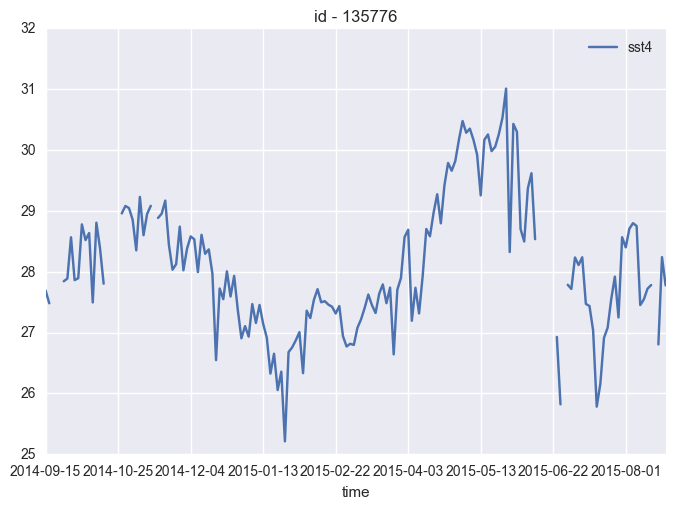

In [3]:
# load preprocessed float data, and start the interpolation right here!!!!
var6 = "sst4"
var5 = "par"
var4 = "t865"
var3 = "kd490"
var2 = "cdm"
var1 = "chl"
vardist = "dist"

indir_prefix = "../data_collector_globcolour/output.data.interpolate/2017GDPfloat/" + "df_Globcolor_"
indir = indir_prefix + var1 + vardist + var2 + var3 + var4 + var5 + var6 + "_" + str(freq) + "d.csv"

floatDF_tmp = pd.read_csv(indir,index_col=0)
print(floatDF_tmp)


### plot for id 125776, which will be fit by LDS
plt.figure(figsize=(8,6))
floatDF_tmp[floatDF_tmp .id == 135776].plot(x='time', y ='sst4', title=('id - %d' % 135776) )
plt.show();
plt.close("all")


# Calculation of the Lagrangian rate of change of the chlor-a concentration

In [4]:
# task 1 -- columns added to the dataframe, 
#           chlor-a on the log-scale 
#           rate of chlor-a
#           rate of log-scale chlor-a
#           nondimensionalization => rescale rates into daily and weekly rates
#           standarization of daily rates
#
# task 2 -- week no. added to the dataframe
#           dataset *not* reduced to Nov-March here
#
# task 3 -- histogram plots on the chl_rate  (probably need to reduce to Nov to March)
#
# task 4 -- output the dataset as a csv file
#           then, process the data seperately for LDS and inference
#
# use a different notebook for plotting of the weekly rates

In [5]:
# https://stackoverflow.com/questions/16780014/import-file-from-parent-directory
# https://stackoverflow.com/questions/16771894/python-nameerror-global-name-file-is-not-defined
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))

from tools import chl_rates  # del(chl_rates)
import importlib
importlib.reload(chl_rates)


<module 'tools.chl_rates' from '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/tools/chl_rates.py'>

In [6]:
freq

2


 ******* [GlobColour] The Multilinear Interpolation Approach for 2D resampling ******* 


 ******* Take the Diff of chlor_a ******* 


 *** the resampling freqency used for nondimensionalization is 2D *** 

check the sum of the chlor_a_rate before the merge 35.40582932227814
check the sum of the chlor_a_rate after the merge 35.40582932227814
check the sum of the chlor_a_log_e_rate before the merge -55.23161675086747
check the sum of the chlor_a_log_e_rate after the merge -55.23161675086747

 ******* 
 summary of the rate of change of chlor_a 
 count    7114.000000
mean        0.004977
std         0.935299
min       -16.659540
25%        -0.016032
50%        -0.001496
75%         0.011979
max        15.917828
Name: chl_rate, dtype: float64

 ******* 
 summary of the rate of change of log-scale chlor-a 
 count    7114.000000
mean       -0.007764
std         0.197654
min        -1.771734
25%        -0.083692
50%        -0.009153
75%         0.066157
max         2.063741
Name: chl_log_e_r

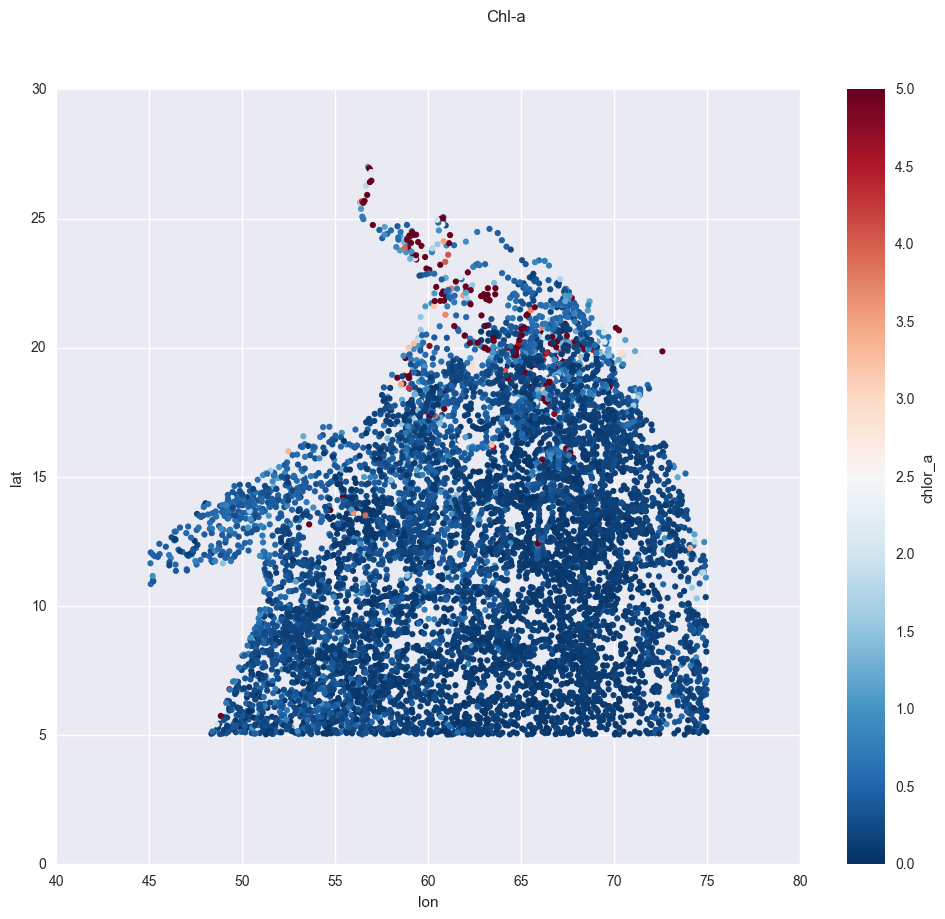

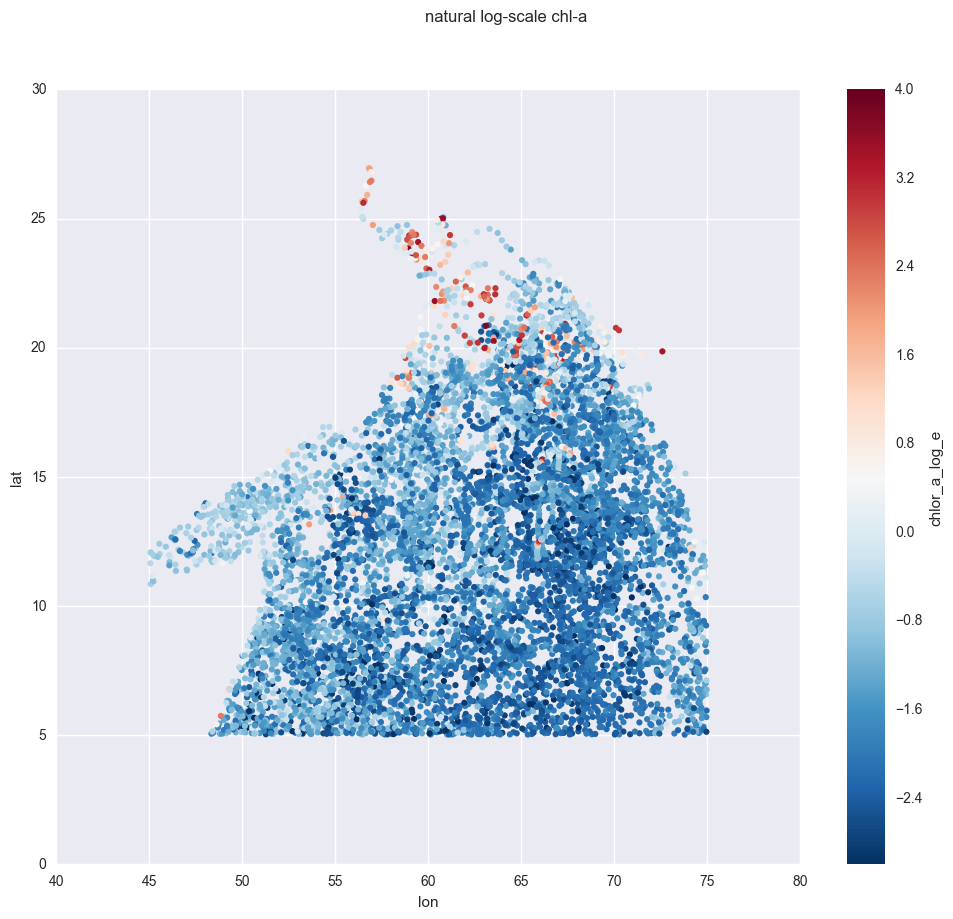

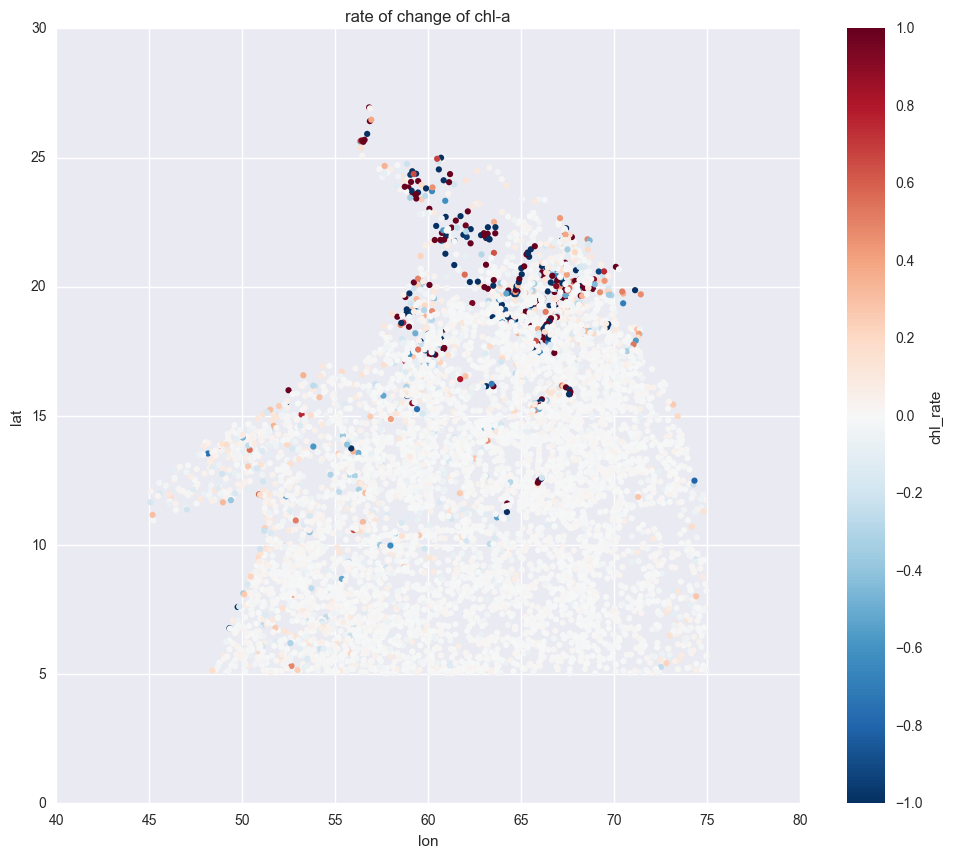

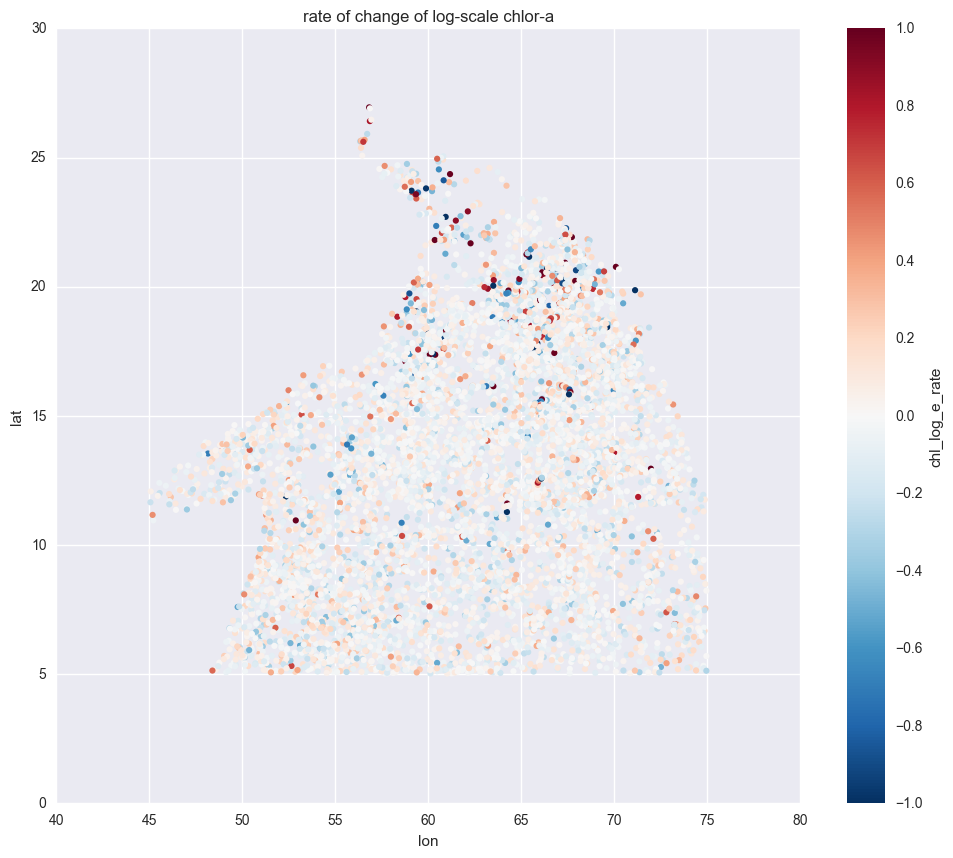


 ******* Select from November-01 to March-31 ******* 

shape of the selector (16661,)
all the data count during 'Nov-01 to Mar-31' is (3932,)
all the data count is (7114,)

 ******* histogram of the rate of change of chl-a ******* 


 ** summary of chl_rate ** 
 count    3932.000000
mean        0.014504
std         1.253814
min       -16.659540
25%        -0.019435
50%        -0.001113
75%         0.018202
max        15.917828
Name: chl_rate, dtype: float64


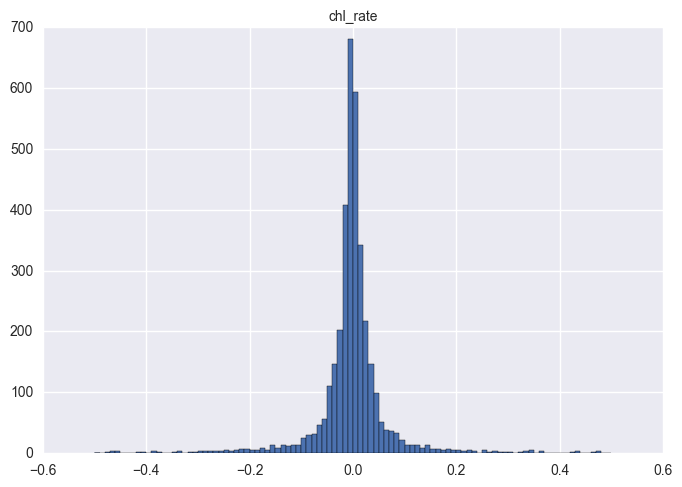


 ** summary of standardized chl_rate ** 
 count    3.932000e+03
mean    -8.004787e-18
std      1.000000e+00
min     -1.329866e+01
25%     -2.706889e-02
50%     -1.245619e-02
75%      2.948967e-03
max      1.268396e+01
Name: chl_rate, dtype: float64


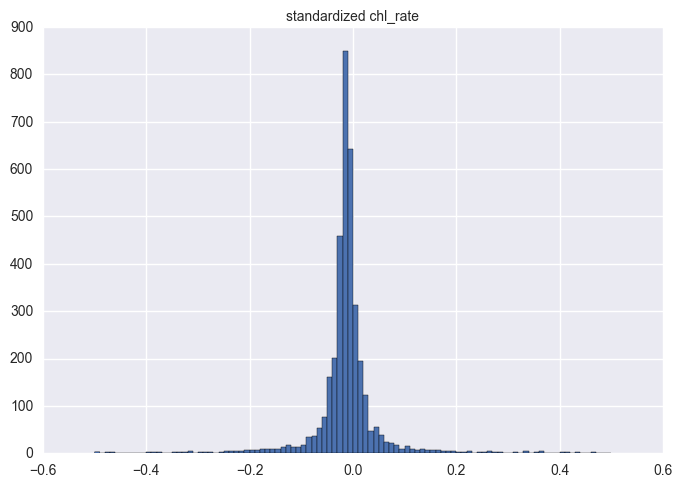


 ******* subplots of the rate of change of chl-a for different years ******* 


 count of data points for each year: 

(390,)
(257,)
(74,)
(270,)
(671,)
(695,)
(869,)
(305,)
(418,)
(175,)
(186,)
(135,)
(917,)
(427,)
(420,)


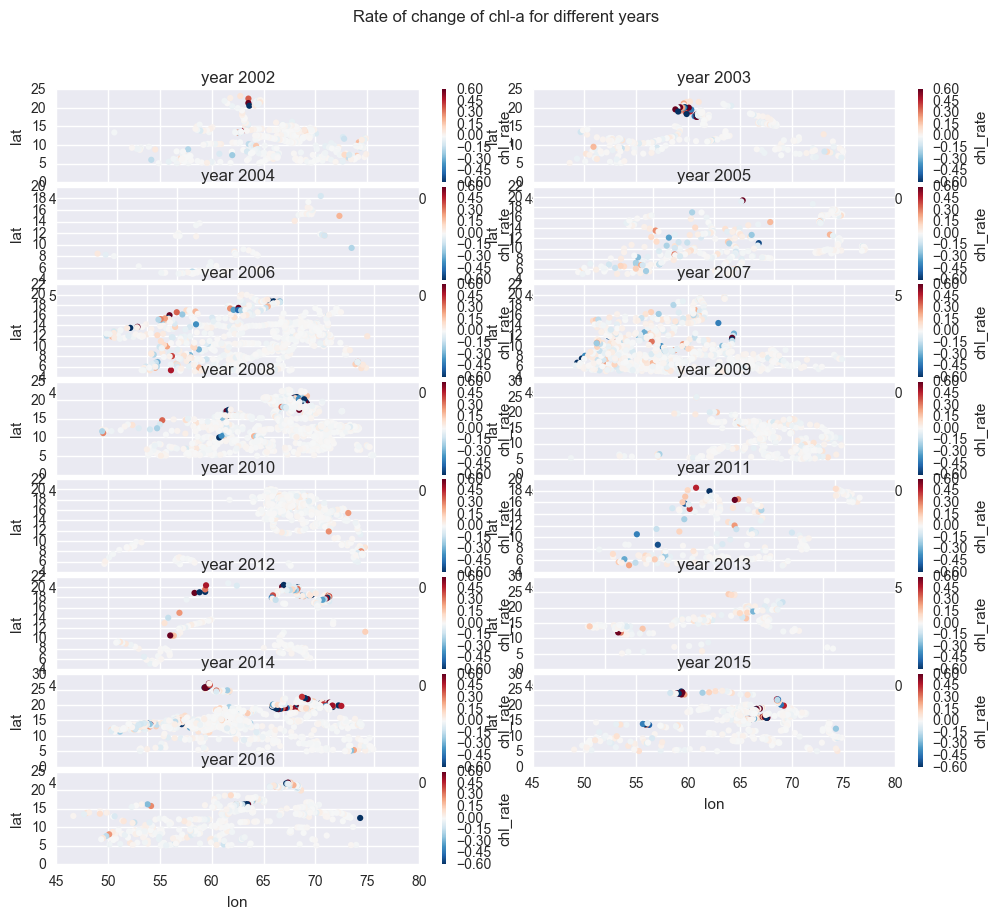


 count of data points during 'November-March' for each year: 

(294,)
(5,)
(64,)
(386,)
(278,)
(601,)
(154,)
(249,)
(29,)
(203,)
(0,)
(491,)
(353,)
(162,)


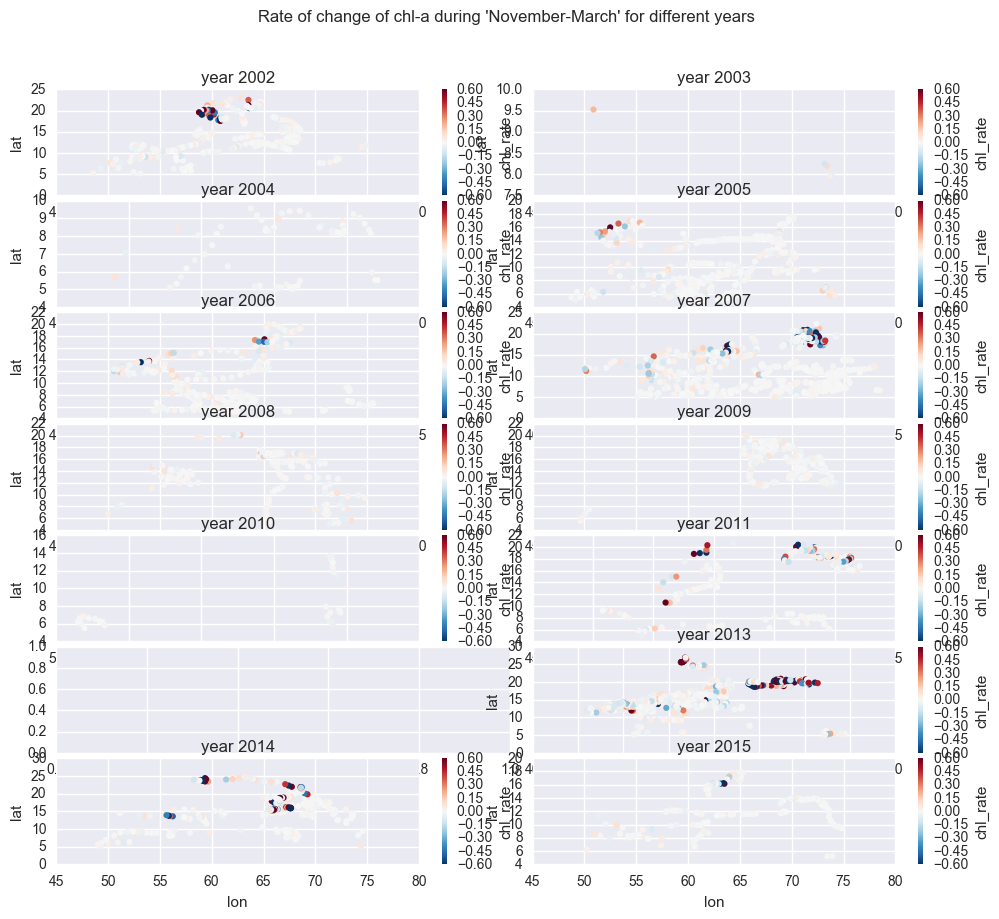

0

In [7]:
print("\n ******* [GlobColour] The Multilinear Interpolation Approach for %dD resampling ******* \n" % (freq))
floatsDF_ChlRate = chl_rates.add_chl_rates_globcolour(floatDF_tmp, freq)

# Add week no.
print("\n **** Adding the 'rotated week no.'; Nov-1 is week no.1 **** \n")
floatsDF_ChlRate_week = chl_rates.add_week(floatsDF_ChlRate) 
print(floatsDF_ChlRate_week)

print("\n ******* Visualization on chl_rate and chl_log_e_rate ******* \n" )
chl_rates.spatial_hist_plots_chl_rate(floatsDF_ChlRate_week)


             time        id        lat        lon       temp         ve  \
0      2002-07-04     10206  16.229625  66.330375        NaN  13.064500   
1      2002-07-04     10208  13.891875  69.552375        NaN   8.505125   
2      2002-07-04     11089  16.354375  64.683750  27.954125  12.168000   
3      2002-07-04     15703  13.903250  69.583125  28.552250   8.685875   
4      2002-07-04     27069  20.169750  68.737500  29.012000  26.958750   
5      2002-07-04     28842  18.878875  60.694625  27.701750  10.499125   
6      2002-07-04     34159  12.548125  58.914250        NaN  27.354250   
7      2002-07-04     34210   6.476750  56.925000  26.694875  -9.666750   
8      2002-07-04     34211   8.602375  67.929125  28.278000  20.618125   
9      2002-07-04     34212   6.232000  64.750250  28.470750  14.641875   
10     2002-07-04     34708  10.167500  59.691500  27.185500  47.792000   
11     2002-07-04     34710  12.933625  49.905250  30.910625 -34.754625   
12     2002-07-04     347

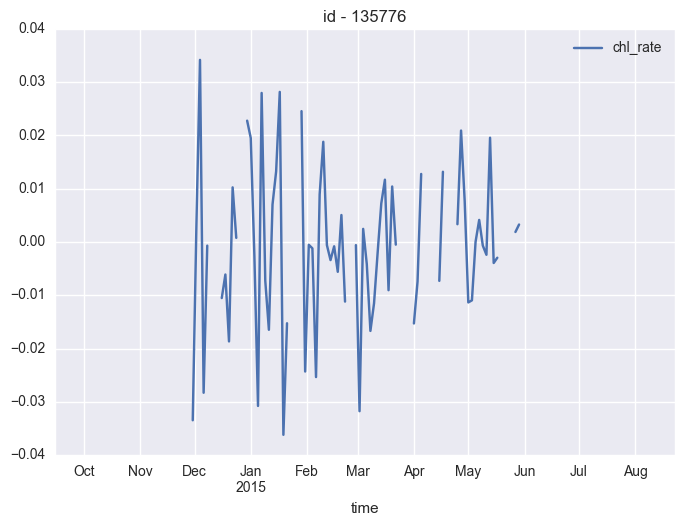

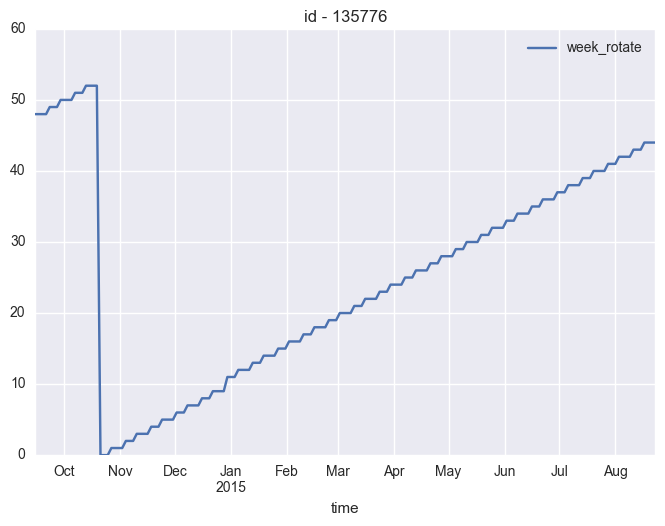

In [8]:
# output the dataframe result_out4
var7 = "chlrateweekno"
outdir_prefix = "../data_collector_globcolour/output.data.interpolate/2017GDPfloat/" + "df_Globcolor_"
outdir = outdir_prefix + var1 + vardist + var2 + var3 + var4 + var5 + var6 + var7 +"_" + str(freq) + "d.csv"
floatsDF_ChlRate_week.to_csv(outdir)
print(pd.read_csv(outdir,index_col=0))

### plot for id 125776, which will be fit by LDS
plt.figure(figsize=(8,6))
floatsDF_ChlRate_week[floatsDF_ChlRate_week.id == 135776].plot(x='time', y ='chl_rate', title=('id - %d' % 135776) )
plt.show();
plt.close("all")

plt.figure(figsize=(8,6))
floatsDF_ChlRate_week[floatsDF_ChlRate_week.id == 135776].plot(x='time', y ='week_rotate', title=('id - %d' % 135776) )
plt.show();
plt.close("all")
